Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import numpy as np
import pandas as pd
import statistics

import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy import stats as st

import requests

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_last = pd.read_csv('/datasets/query_last.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [6]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Как мы видим типы соотвествуют данным

In [9]:
def total_city_for(df):
    return (
        df
            .pivot_table(index='city', values='average_flights')
            .sort_values('average_flights', ascending=False)
    )

In [10]:
def bar_plot(df, size):
    (
        df
            .plot(kind='bar', y='average_flights', figsize=(size, 5), legend=False)
            .set(xlabel='город', ylabel='average_flights')
        
    )
    plt.title("Города и количество рейсов", fontsize = 20)
    plt.show()

Text(0.5, 1.0, 'Города и количество рейсов')

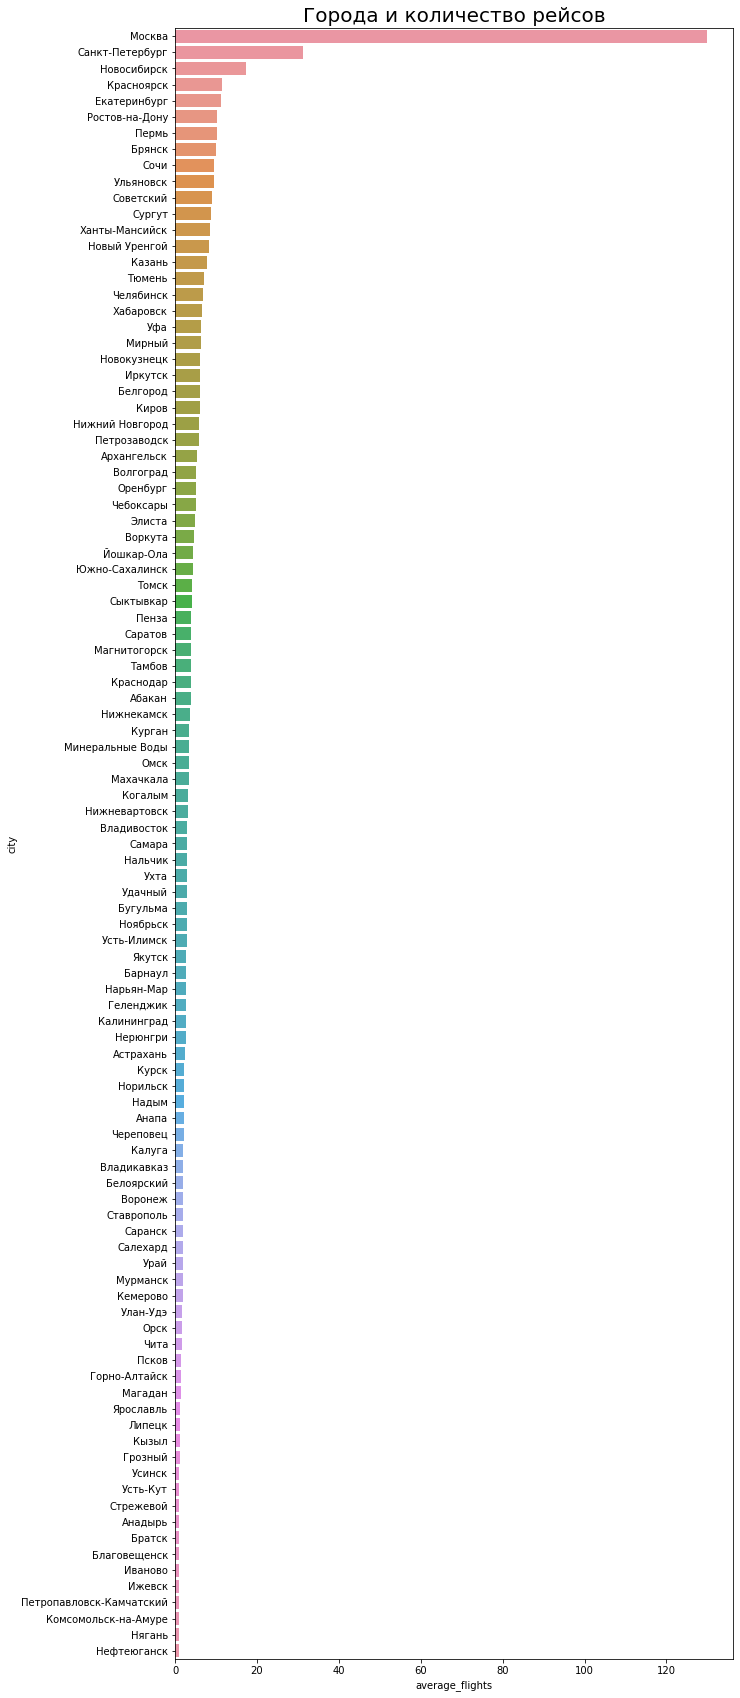

In [11]:
plt.figure(figsize = (10,30))
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False))
plt.title("Города и количество рейсов", fontsize = 20)

Слишком много городов чтобы увидеть их на графике

In [12]:
query_3.sort_values('average_flights', ascending=False).head(30)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Можно заметить что все что идет ниже 7 очень близкие друг другу по значению - можно сократить все города ниже 7 и взять среднее

In [13]:
df_query_3 = query_3.loc[query_3['average_flights']<7]
num = df_query_3['average_flights'].mean()
num

3.047001543734103

In [14]:
new_query_3 = query_3.loc[query_3['average_flights']>7]
new_query_3 = new_query_3.append(pd.DataFrame([['Другие города', num]], columns = new_query_3.columns),ignore_index=True)

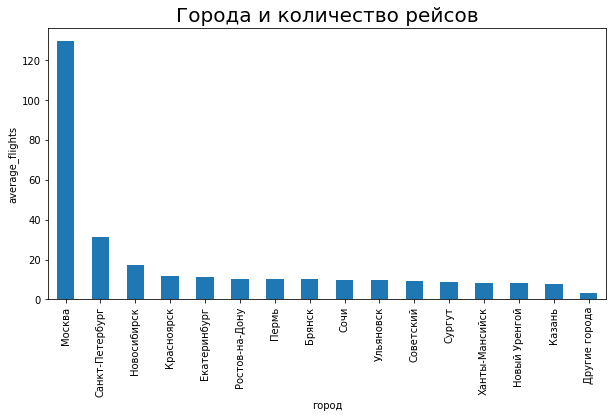

In [15]:
bar_plot(total_city_for(new_query_3),10)

Теперь выберем топ 10 городов по количеству рейсов

Text(0.5, 1.0, 'Топ-10 городов и количество рейсов')

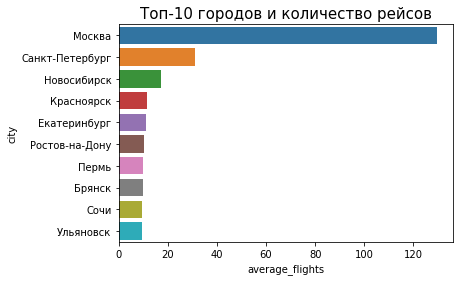

In [16]:
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False).head(10))
plt.title("Топ-10 городов и количество рейсов", fontsize = 15)

Видно что больше всего рейсов из Москвы и городов миллиоников Санкт-Петербург и Новосибирск

Посторим график модели самолётов и количество рейсов

Text(0.5, 1.0, 'Модели самолётов и количество рейсов')

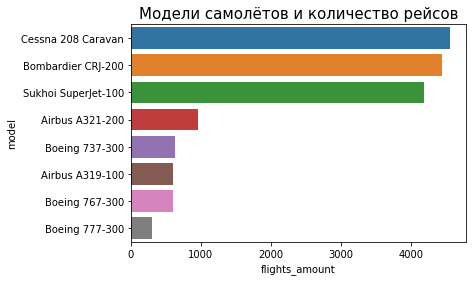

In [17]:
sns.barplot(x='flights_amount',
            y='model',
            data=query_1.sort_values(by='flights_amount', ascending=False))
plt.title("Модели самолётов и количество рейсов", fontsize = 15)

Как мы видим больше все полетов у самолета малой авиации и пассаржиских с малой дальностью

# 2. Проверка гипотезы

Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Сформулируем гипотезы:

- H0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
- H1: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

По сути нам надо проверить равенство средних в выборке количество билетов в недели когда есть фестивали и когда их нет. Используем для этого t-test Стьюдента из пакета scipy.stats

In [18]:
sample1 = query_last.loc[query_last['festival_week'].isna(), 'ticket_amount']
sample2 = query_last.loc[~query_last['festival_week'].isna(), 'ticket_amount']

assert (sample1.shape[0] + sample2.shape[0]) == query_last.shape[0]

In [19]:
print("Variance of sample1 set is % s" %(statistics.variance(sample1)))
print("Variance of sample2 set is % s" %(statistics.variance(sample2)))
print(statistics.variance(sample2) - statistics.variance(sample1))

Variance of sample1 set is 17143.47619047619
Variance of sample2 set is 19497697.333333332
19480553.857142854


Хоть выборки предаположительно из одной генеральной совокупность, НО
у нас дисперсии выборок различаются значительно equal_var=False

In [20]:
res = st.ttest_ind(sample1, sample2, equal_var=False)
alpha = 0.05

print('p-значение:', res.pvalue)

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Как мы видим pvalue > 0.05, соответвенно мы не отвергаем 0 гипотезу.

Мы не можем утверждать о статистически значимой разнице между спрос на билеты во время фестивалей и в обычное время